# Week 2 - Mandatory Project

---

In [ ]:
#pip install numpy pandas shapely geopandas     # Python package installer

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

In [ ]:
df = pd.read_excel('Dataset.xlsx')    # Read Dataset
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
df.info()    # Data info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df.isnull().sum()     # Find missing value

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
df.describe()       # Data description

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#### 1. What is the average median income of the data set and check the distribution of data using appropriate plots. Please explain the distribution of the plot.

In [ ]:
avg_median_income = df['median_income'].mean()       # Average of Median income 
print(f'Average Median Income: {avg_median_income}')  

Average Median Income: 3.8706710029069766


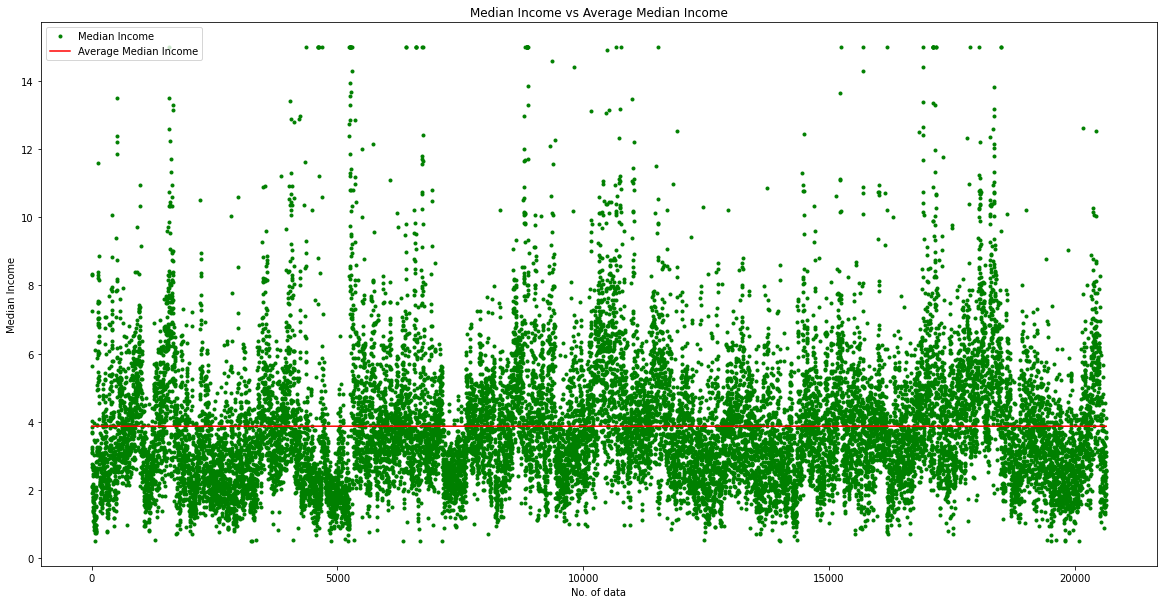

In [ ]:
plt.figure(figsize=(20, 10))       # Resize the figure

plt.plot(df.median_income, 'g.', label='Median Income')     # Plotting Median income 
plt.plot(avg_median_income * np.ones(20640), 'r-', label='Average Median Income')    # Plotting Average Median income

plt.title('Median Income vs Average Median Income')   # Title of the figure
plt.xlabel('No. of data')   
plt.ylabel('Median Income')   

plt.legend()         
plt.show()

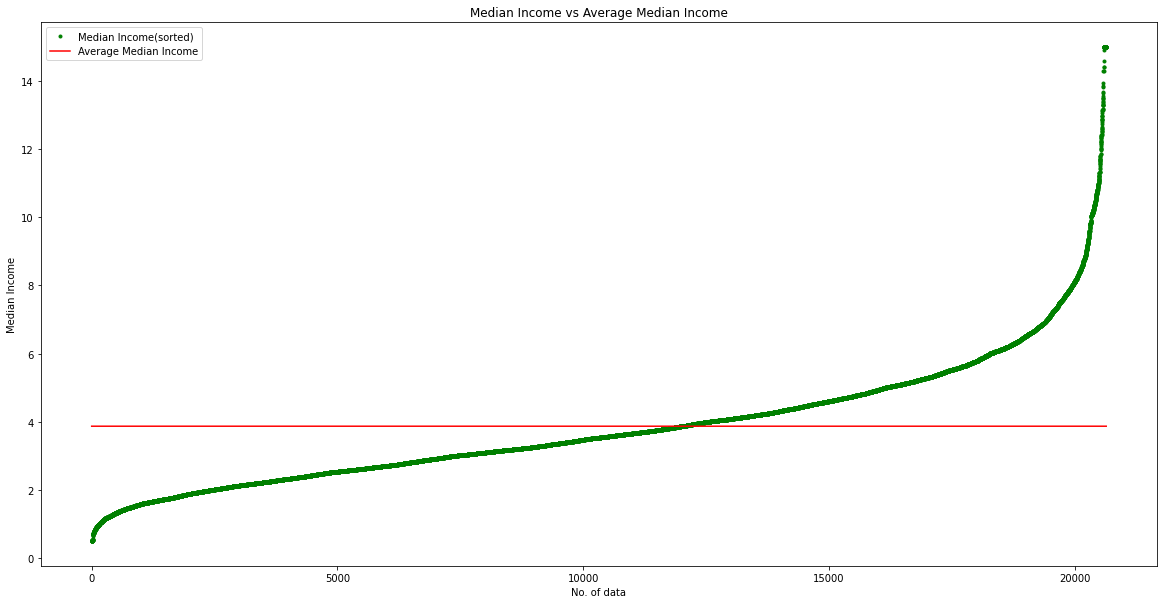

In [ ]:
plt.figure(figsize=(20, 10))       # Resize the figure

# sorted_median_income = df.median_income.sort_values()   # Sort the Median income value

plt.plot(np.arange(20640), df.median_income.sort_values(), 'g.', label='Median Income(sorted)')     # Plotting Median income 
plt.plot(avg_median_income * np.ones(20640), 'r-', label='Average Median Income')    # Plotting Average Median income

plt.title('Median Income vs Average Median Income')   
plt.xlabel('No. of data')  
plt.ylabel('Median Income')   

plt.legend()         
plt.show()

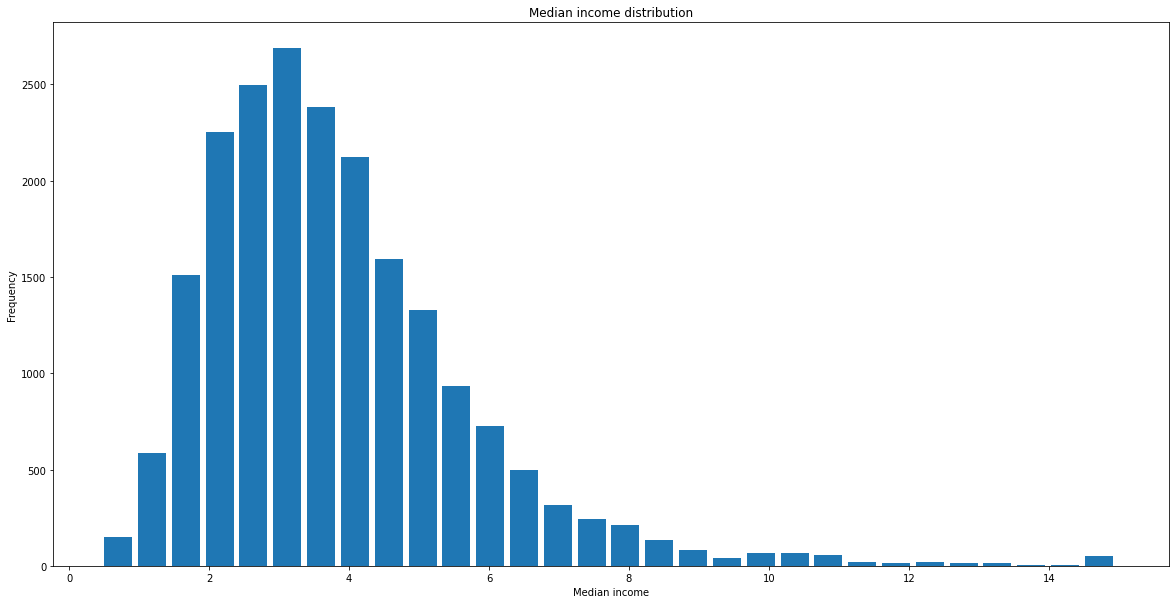

In [ ]:
plt.figure(figsize=(20, 10))       # Resize the figure
plt.hist(df.median_income, bins = 30, width = 0.4 )  ## Plotting histogram Median income

plt.xlabel('Median income')   
plt.ylabel('Frequency')
plt.title('Median income distribution')
plt.show()

#### 2. Draw an appropriate plot to see the distribution of housing_median_age and explain your observations.

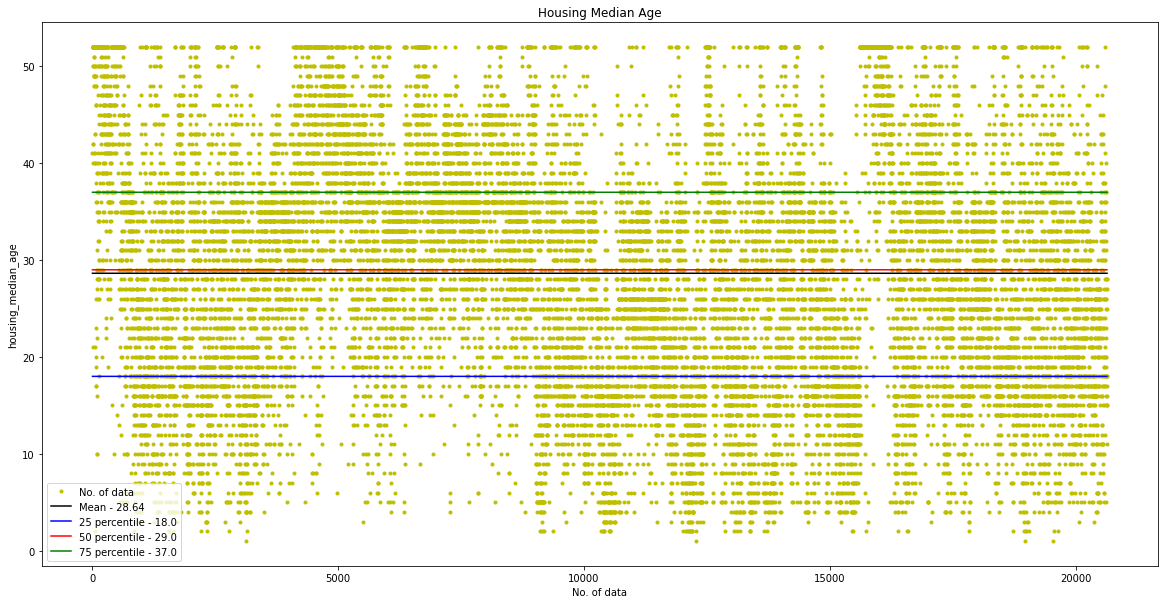

In [ ]:
plt.figure(figsize=(20, 10))     # Resize the figure

mean = df.housing_median_age.mean()    # Mean of Housing median age
percentile_25 = df.housing_median_age.quantile(0.25)   #25 percentile
percentile_50 = df.housing_median_age.quantile(0.50)   #50 percentile
percentile_75 = df.housing_median_age.quantile(0.75)   #75 percentile

plt.plot(df.housing_median_age, 'y.', label='No. of data')        # Plotting of Housing Median income 
plt.plot(mean * np.ones(20640), 'k-', label=f'Mean - {round(mean, 2)}')    # Plotting Mean of Housing median age
plt.plot(percentile_25 * np.ones(20640), 'b-', label=f'25 percentile - {percentile_25}')    # Plotting of 25 percentile
plt.plot(percentile_50 * np.ones(20640), 'r-', label=f'50 percentile - {percentile_50}')    # Plotting of 50 percentile
plt.plot(percentile_75 * np.ones(20640), 'g-', label=f'75 percentile - {percentile_75}')    # Plotting of 75 percentile

plt.title('Housing Median Age')
plt.xlabel('No. of data')         
plt.ylabel('housing_median_age')   

plt.legend()
plt.show()

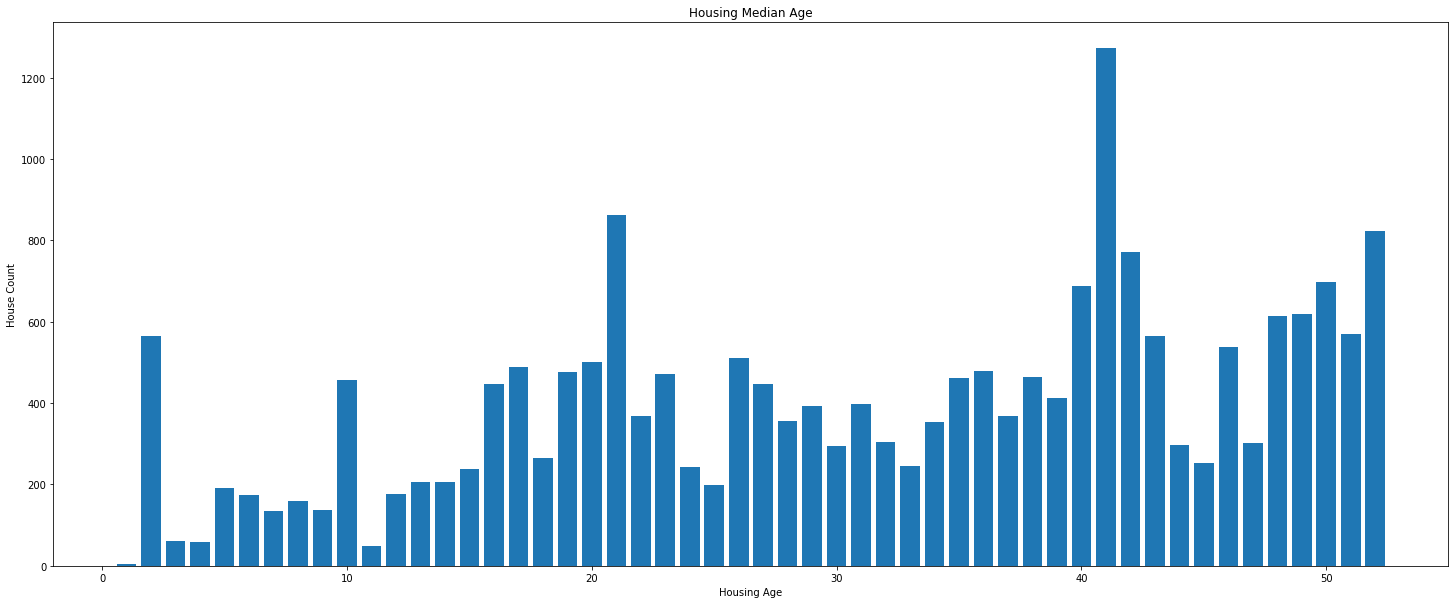

In [ ]:
plt.figure(figsize=(25, 10))     # Resize the figure

housing_age = df.housing_median_age.unique()      # Unique value of Housing median age
housing_age_value = df.housing_median_age.value_counts()    # Count of of Housing median age
length = len(housing_age)       # Length of Unique value of Median Housing median age

plt.bar(housing_age, housing_age_value)    # Bar graph

plt.title('Housing Median Age')
plt.xlabel('Housing Age')  
plt.ylabel('House Count') 

plt.show()

#### 3. Show with the help of visualization, how median_income and median_house_values are related?

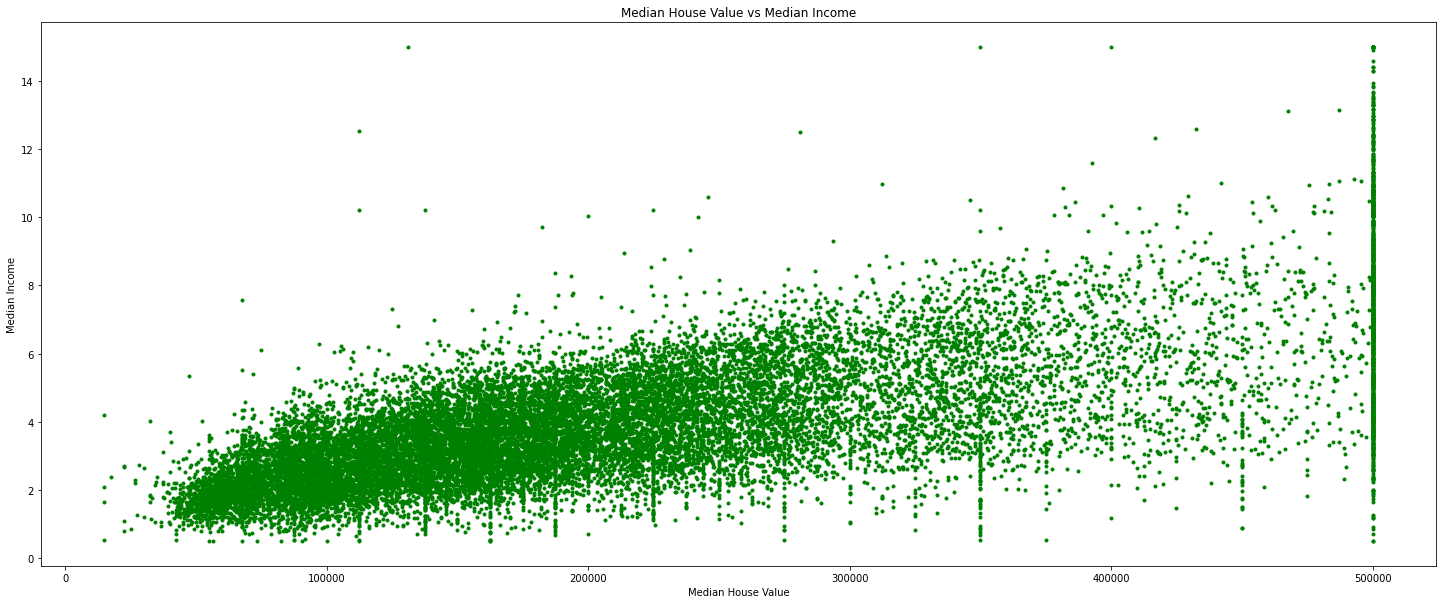

In [ ]:
plt.figure(figsize=(25, 10))     # Resize the figure

plt.plot(df.median_house_value, df.median_income, 'g.' )      # Plotting of Median House value    

plt.title('Median House Value vs Median Income')
plt.xlabel('Median House Value')
plt.ylabel('Median Income')

plt.show()

#### 4. Create a data set by deleting the corresponding examples from the data set for which total_bedrooms are not available.

In [ ]:
df2 = df.copy()    # Copy of dataset
df2.dropna(axis=0, subset=['total_bedrooms'], inplace=True)  # Delete corresponding examples from the dataset where total_bedrooms are not available
df2.head()   

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#### 5. Create a data set by filling the missing data with the mean value of the total_bedrooms in the original data set.

In [ ]:
mean = df.total_bedrooms.mean()      # Mean value of total bedrooms

df3 = df.copy()      # Copy of dataset
df3.total_bedrooms.fillna(value=mean, inplace=True)     # Fill the missing data with the mean value
df3.loc[df3.total_bedrooms == mean].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,537.870553,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,537.870553,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,537.870553,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,537.870553,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,537.870553,387.0,161.0,3.9063,178400.0,NEAR BAY


#### 6. Write a programming construct (create a user defined function) to calculate the median value of the data set wherever required.

In [ ]:
def calculate_median(data):                    # Create a user defined function
    return pd.Series(data).median()   

In [ ]:
calculate_median(df.total_rooms)               # Example by taking Median of total rooms

2127.0

In [ ]:
calculate_median([100, 200, 300, 400, 500, 600])      # Example by taking some random no's

350.0

#### 7. Plot latitude versus longitude and explain your observations.

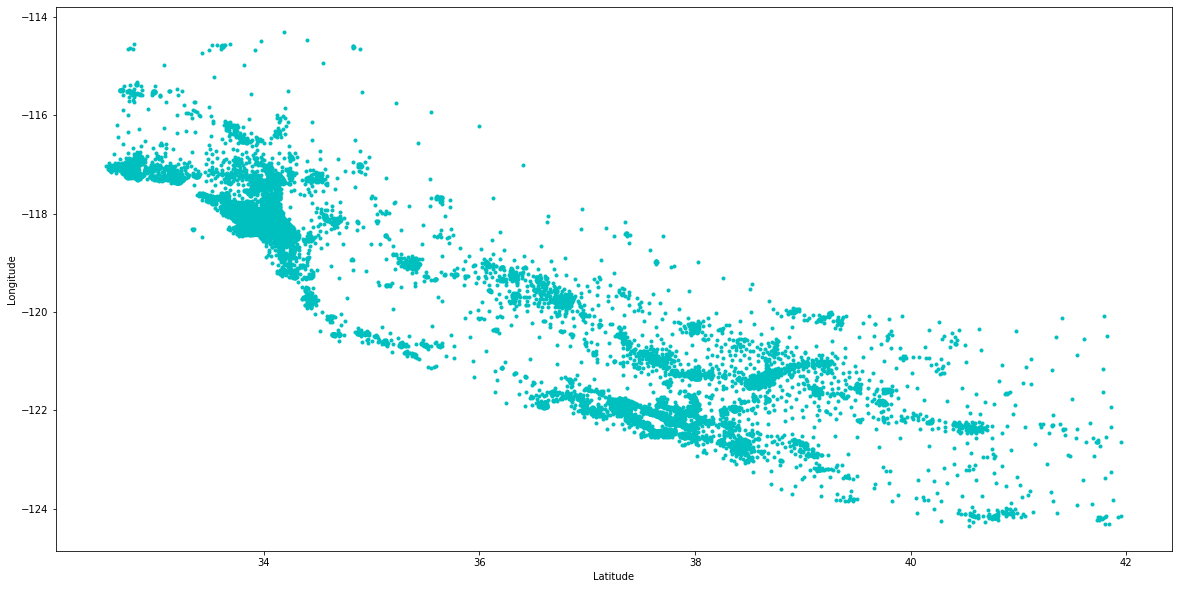

In [ ]:
plt.figure(figsize=(20, 10))      # Resize the figure

plt.plot(df.latitude, df.longitude, 'c.')      # Plotting of  latitude v/s longitude  
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

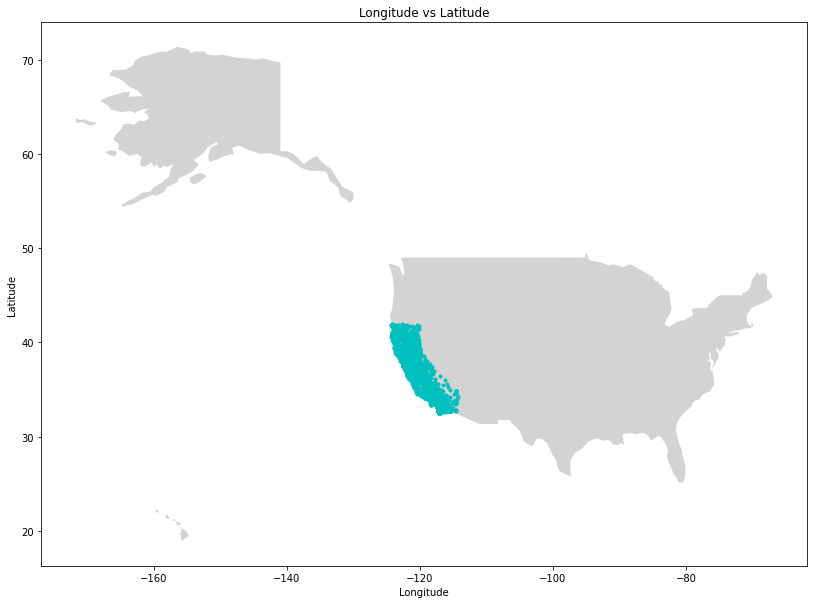

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))        # Resize the figure

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))      # World map   
usa = world[world["name"] == "United States of America"].plot(color="lightgrey", ax=ax)      # United States of America map

plt.title('Longitude vs Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.plot(df.longitude, df.latitude, 'c.')       # Plotting of  latitude v/s longitude
plt.show()

#### 8. Create a data set for which the ocean_proximity is ‘Near ocean’.

In [ ]:
df4 = df.loc[df.ocean_proximity == 'NEAR OCEAN']      # Ocean proximity is Near ocean
df4.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1850,-124.17,41.80,16.0,2739.0,480.0,1259.0,436.0,3.7557,109400.0,NEAR OCEAN
1851,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0,NEAR OCEAN
1852,-124.23,41.75,11.0,3159.0,616.0,1343.0,479.0,2.4805,73200.0,NEAR OCEAN
1853,-124.21,41.77,17.0,3461.0,722.0,1947.0,647.0,2.5795,68400.0,NEAR OCEAN
1854,-124.19,41.78,15.0,3140.0,714.0,1645.0,640.0,1.6654,74600.0,NEAR OCEAN


#### 9. Find the mean and median of the median income for the data set created in question 8.

In [ ]:
print(f'Mean: {df4.median_income.mean()}')           #  Mean of the median income
print(f'Median: {df4.median_income.median()}')         # Median of the median income

Mean: 4.0057848006019565
Median: 3.64705


#### 10. Please create a new column named total_bedroom_size. If the total bedrooms is 10 or less, it should be quoted as small. If the total bedrooms is 11 or more but less than 1000, it should be medium, otherwise it should be considered large.

In [ ]:
conditions = [(df.total_bedrooms <= 10),         # total bedrooms is 10 or less --> small
              ((df.total_bedrooms > 10) & (df.total_bedrooms < 1000)),      #  11 or more but less than 1000 --> medium   
              (df.total_bedrooms > 1000)]          # Others --> large 

values = ['small', 'medium', 'large']

df['total_bedroom_size'] = np.select(conditions, values)         # create a new column named total_bedroom_size 

df[['total_bedrooms', 'total_bedroom_size']].head()

,total_bedrooms,total_bedroom_size
0,129.0,medium
1,1106.0,large
2,190.0,medium
3,235.0,medium
4,280.0,medium
